In [255]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier


In [256]:
np.random.seed(42)
rows = 1500

df = pd.DataFrame({
    "Gender": np.random.choice(["Male", "Female"], rows),
    "SeniorCitizen": np.random.choice([0, 1], rows),
    "Tenure": np.random.randint(1, 72, rows),
    "MonthlyCharges": np.random.randint(100, 500, rows),
    "InternetService": np.random.choice(["DSL", "Fiber", "None"], rows),
    "Contract": np.random.choice(["Month-to-month", "One year", "Two year"], rows),
    "TechSupport": np.random.choice(["Yes", "No"], rows),
    "PaymentMethod": np.random.choice(["Online", "Card", "Bank"], rows),
    "Churn": np.random.choice([0, 1], rows, p=[0.7, 0.3])
})

print("Sample Dataset:")
print(df.head())


Sample Dataset:
   Gender  SeniorCitizen  Tenure  MonthlyCharges InternetService  \
0    Male              0      48             173             DSL   
1  Female              1      66             135             DSL   
2    Male              1      70             200            None   
3    Male              0      28             255           Fiber   
4    Male              0      26             354             DSL   

         Contract TechSupport PaymentMethod  Churn  
0        Two year         Yes        Online      0  
1        Two year         Yes        Online      0  
2        One year         Yes        Online      1  
3        One year          No        Online      0  
4  Month-to-month          No          Bank      0  


In [257]:
encoders = {}

for col in df.columns:
    if df[col].dtype == "object":
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        encoders[col] = le


In [258]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [259]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=120),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier()
}


In [260]:
trained_models = {}
results = {}

for name, model in models.items():
    print("\n==============================")
    print("Training:", name)
    print("==============================")

    model.fit(X_train, y_train)
    trained_models[name] = model

    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc

    print("Accuracy:", acc)
    print("Classification Report:")
    print(classification_report(y_test, preds))





Training: Random Forest
Accuracy: 0.73
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.93      0.84       228
           1       0.29      0.08      0.13        72

    accuracy                           0.73       300
   macro avg       0.52      0.51      0.48       300
weighted avg       0.65      0.73      0.67       300


Training: Gradient Boosting
Accuracy: 0.76
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.97      0.86       228
           1       0.50      0.08      0.14        72

    accuracy                           0.76       300
   macro avg       0.64      0.53      0.50       300
weighted avg       0.71      0.76      0.69       300


Training: AdaBoost
Accuracy: 0.76
Classification Report:
              precision    recall  f1-score   support

           0       0.76      1.00      0.86       228
           1       0.00      0.00      0.00      

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [261]:
new_customer = {
    "Gender": "Female",
    "SeniorCitizen": 0,
    "Tenure": 10,
    "MonthlyCharges": 380,
    "InternetService": "Fiber",
    "Contract": "Month-to-month",
    "TechSupport": "No",
    "PaymentMethod": "Online"
}

new_df = pd.DataFrame([new_customer])

for col in new_df.columns:
    if col in encoders:
        new_df[col] = encoders[col].transform(new_df[col])


In [262]:
print("\n🔍 CHURN PREDICTION RESULT\n")

for name, model in trained_models.items():
    churn_class = model.predict(new_df)[0]
    churn_prob = model.predict_proba(new_df)[0][1]

    print(f"{name}:")
    print(" Predicted Churn (0 = No, 1 = Yes):", churn_class)
    print(" Churn Probability:", round(churn_prob, 3))
    print("-" * 40)



🔍 CHURN PREDICTION RESULT

Random Forest:
 Predicted Churn (0 = No, 1 = Yes): 0
 Churn Probability: 0.242
----------------------------------------
Gradient Boosting:
 Predicted Churn (0 = No, 1 = Yes): 0
 Churn Probability: 0.258
----------------------------------------
AdaBoost:
 Predicted Churn (0 = No, 1 = Yes): 0
 Churn Probability: 0.278
----------------------------------------


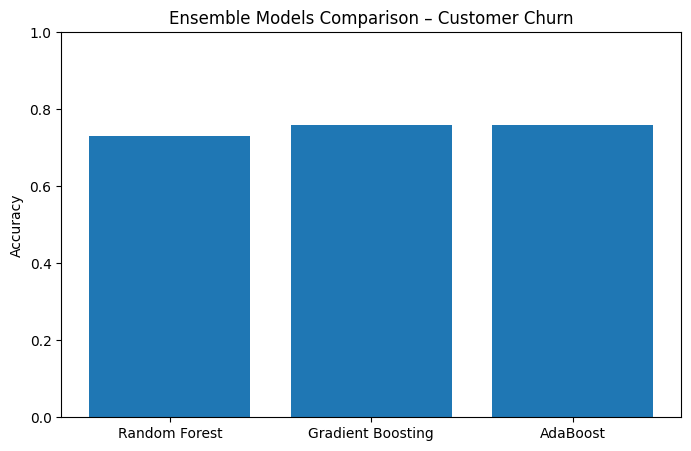

Final Accuracies: {'Random Forest': 0.73, 'Gradient Boosting': 0.76, 'AdaBoost': 0.76}


In [263]:
plt.figure(figsize=(8,5))
plt.bar(results.keys(), results.values())
plt.ylabel("Accuracy")
plt.title("Ensemble Models Comparison – Customer Churn")
plt.ylim(0,1)
plt.show()

print("Final Accuracies:", results)
